In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

prices = pd.read_csv('joe_data.csv')

In [44]:
# rename col
prices = prices.rename(columns={'Data from DEX.AG API': 'price_diff_pct',
                                'Date collected': 'date'})


In [45]:
# Remove % sign, cast as float
prices['price_diff_pct'] = [x[:-1] for x in prices['price_diff_pct']]
prices['price_diff_pct'] = prices['price_diff_pct'].astype(float)

In [27]:
#prices['12hr_avg'] = prices['price_diff_pct'].rolling(144).mean()


,Date collected,price_diff_pct,12hr_avg
0,07/29/20 11:17 AM,2.08,NaN
1,07/29/20 11:18 AM,2.08,NaN
2,07/29/20 11:23 AM,2.06,NaN
3,07/29/20 11:28 AM,2.06,NaN
4,07/29/20 11:33 AM,2.06,NaN
5,07/29/20 11:38 AM,2.06,NaN
6,07/29/20 11:43 AM,2.04,NaN
7,07/29/20 11:48 AM,2.04,NaN
8,07/29/20 11:53 AM,2.05,NaN
9,07/29/20 11:58 AM,2.05,NaN


In [ ]:
# # Extract date info
# from fastai.tabular import add_datepart
# add_datepart(prices, 'date')
# new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [48]:
# convert to datetime
prices['date'] = pd.to_datetime(prices['date'], format = '%m/%d/%y %H:%M %p')

# Drop last row (NA)
prices = prices.iloc[:-1]


,date,price_diff_pct
1710,2020-08-04 05:18:00,1.36
1711,2020-08-04 05:23:00,1.47
1712,2020-08-04 05:28:00,1.45
1713,2020-08-04 05:33:00,1.45
1714,NaT,1.46


In [54]:
# Set date as index
prices.index = prices['date']
prices = prices.drop('date', axis = 1)

In [60]:
# Split into 80/20 train/test
train_cutoff = int(np.floor(len(prices) * .8))

train = prices.iloc[:train_cutoff]
test = prices.iloc[train_cutoff:]



NameError: name 'MinMaxScaler' is not defined

In [68]:


# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


array([[[0.38745387],
        [0.38745387],
        [0.3800738 ],
        ...,
        [0.58302583],
        [0.60147601],
        [0.60147601]],

       [[0.38745387],
        [0.3800738 ],
        [0.3800738 ],
        ...,
        [0.60147601],
        [0.60147601],
        [0.56826568]],

       [[0.3800738 ],
        [0.3800738 ],
        [0.3800738 ],
        ...,
        [0.60147601],
        [0.56826568],
        [0.61254613]],

       ...,

       [[0.05904059],
        [0.05166052],
        [0.05166052],
        ...,
        [0.19188192],
        [0.19188192],
        [0.19188192]],

       [[0.05166052],
        [0.05166052],
        [0.05166052],
        ...,
        [0.19188192],
        [0.19188192],
        [0.19926199]],

       [[0.05166052],
        [0.05166052],
        [0.04797048],
        ...,
        [0.19188192],
        [0.19926199],
        [0.19557196]]])

In [69]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = prices[len(prices) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1312/1312 - 18s - loss: 0.0062


In [70]:
rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
rms

price_diff_pct    0.097485
dtype: float64

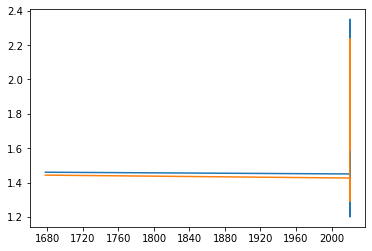

In [80]:
#for plotting
import matplotlib.pyplot as plt

train = prices[:train_cutoff]
valid = prices[train_cutoff:]
valid['Predictions'] = closing_price
#plt.plot(train['price_diff_pct'])
plt.plot(valid[['price_diff_pct','Predictions']])

In [81]:
# 24hr hi/lo
# 7day hi/lo
# moving avgs
# moving SDs

,price_diff_pct,Predictions
date,,
2020-08-03 02:08:00,1.59,1.589694
2020-08-03 02:13:00,1.57,1.599501
2020-08-03 02:18:00,1.58,1.605032
2020-08-03 02:23:00,1.59,1.609120
2020-08-03 02:28:00,1.58,1.613242
2020-08-03 02:33:00,1.54,1.615539
2020-08-03 02:38:00,1.43,1.611471
2020-08-03 02:43:00,1.44,1.590614
2020-08-03 02:48:00,1.45,1.565873
